In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set();

In [46]:
applied = {
            "3M":["Dylan","Lois","Dan","Noah","Swetha","Ikenna","Melanie","Kyle","JF"],
            "DogVacay":['Dan','Dylan','Ikenna','Jimmy','Natalie','Peter','Swetha'],
            'Aurotech':['Ikenna','Kyle','Melanie','Noah','Peter','Cindy','Swetha'],
            'tronc':['Cindy','Dan','Ikenna','JF','Jimmy','Natalie','Peter','Swetha'],
            'InVenture':['Amelia','Cindy','Dan','Dylan','Ikenna','JF','Jimmy','Kyle','Melanie','Natalie','Peter','Swetha'],
            'Nielsen':['Cindy','Dan','Dylan','Ikenna','JF','Jimmy','Josh','Kyle','Melanie','Natalie','Noah','Peter','Swetha'],
            'BCG':['Cindy','Dylan','Ikenna','JF','Jimmy','Josh','Kyle','Melanie','Natalie','Noah','Peter','Swetha'],
            'Facebook':['Amelia','Cindy','Dan','Dylan','Ikenna','JF','Jimmy','Josh','Kyle','Lois','Melanie','Natalie','Noah','Peter','Swetha'],
            'Netflix':['Cindy','Dylan','JF','Jimmy','Kyle','Melanie','Natalie','Peter','Swetha'],
            'Virtu':['Dylan','JF','Noah','Peter'],
            'Amazon':['Amelia','Cindy','Dylan','Ikenna','JF','Jimmy','Josh','Kyle','Lois','Natalie','Noah','Peter','Swetha'],
            'Goodyear':['Cindy','Dan','Dylan','Ikenna','Jimmy','Kyle','Melanie','Noah','Peter'],
            'HomeAway':['Cindy','Dan','Dylan','Ikenna','JF','Josh','Kyle','Lois','Melanie','Natalie','Noah','Peter'],
            'Intuit':['Amelia','Cindy','Dan','Dylan','Ikenna','JF','Jimmy','Kyle','Lois','Melanie','Natalie','Peter','Swetha'],
            'iSpot.tv':['Amelia','Cindy','Dan','Dylan','Ikenna','JF','Jimmy','Josh','Kyle','Lois','Melanie','Natalie','Noah','Peter','Swetha'],
            'Payoff':['Cindy','Dan','Dylan','Ikenna','JF','Jimmy','Kyle','Melanie','Natalie','Peter','Swetha'],
            'Red Bull':['Amelia','Cindy','Dan','Dylan','Ikenna','JF','Jimmy','Kyle','Natalie','Peter','Swetha'],
            'Shopify':['Cindy','Dan','Dylan','Ikenna','JF','Jimmy','Kyle','Lois','Melanie','Noah','Peter','Swetha'],
            'Zymergen':['Amelia','Cindy','Dan','Dylan','Ikenna','JF','Jimmy','Josh','Kyle','Lois','Melanie','Natalie','Noah','Peter','Swetha'],
            }

print "{} total companies in queue.".format(len(applied))

19 total companies in queue.


In [84]:
fellows = ['Amelia','Cindy','Dan','Dylan','Ikenna',
           'JF','Jimmy','Josh','Kyle','Lois',
           'Melanie','Natalie','Noah','Peter','Swetha']

indexes = []
arr = np.zeros((len(applied),len(fellows)),dtype=int)
for i,c in enumerate(applied):
    indexes.append(c)
    for person in applied[c]:
        arr[i,fellows.index(person)] = 1

In [85]:
df = pd.DataFrame(data=arr,
                  index=indexes,
                  columns=fellows)
df.head()

,Amelia,Cindy,Dan,Dylan,Ikenna,JF,Jimmy,Josh,Kyle,Lois,Melanie,Natalie,Noah,Peter,Swetha
Red Bull,1,1,1,1,1,1,1,0,1,0,0,1,0,1,1
BCG,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1
Shopify,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1
tronc,0,1,1,0,1,1,1,0,0,0,0,1,0,1,1
Payoff,0,1,1,1,1,1,1,0,1,0,1,1,0,1,1


In [86]:
# Co-occurrence matrix is the product of the matrix and its transpose

coocc = df.T.dot(df)
coocc.head()

,Amelia,Cindy,Dan,Dylan,Ikenna,JF,Jimmy,Josh,Kyle,Lois,Melanie,Natalie,Noah,Peter,Swetha
Amelia,7,7,6,7,7,7,7,4,7,5,5,7,4,7,7
Cindy,7,16,12,14,15,14,14,7,15,7,13,13,10,16,14
Dan,6,12,14,13,14,12,12,5,12,7,11,11,8,13,12
Dylan,7,14,13,17,15,15,14,7,15,8,13,13,11,16,14
Ikenna,7,15,14,15,17,14,14,7,15,8,13,13,11,16,15


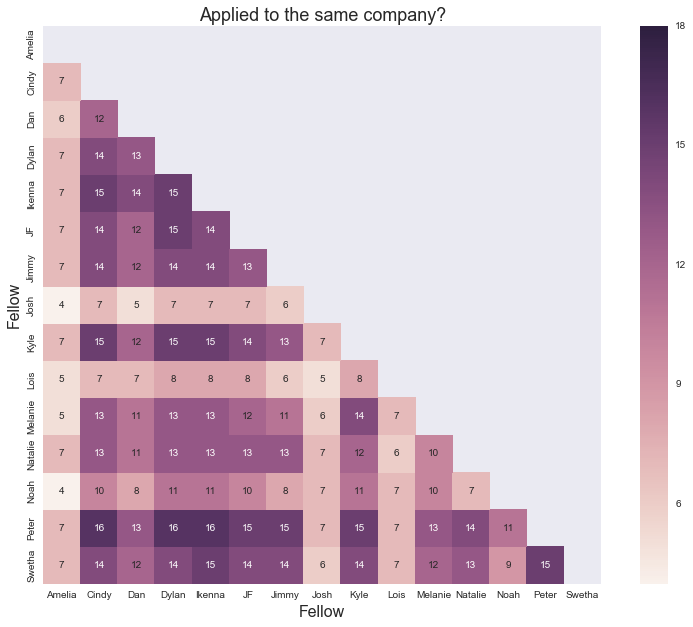

In [87]:
fig,ax = plt.subplots(1,1,figsize=(14,10))
mask = np.zeros_like(coocc)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(coocc,
                mask = mask,
                annot=True, fmt="d",
                square=True,
                ax=ax)
    ax.set_xlabel('Fellow',fontsize=16)
    ax.set_ylabel('Fellow',fontsize=16)
    ax.set_title("Applied to the same company?",fontsize=18);

In [71]:
# People applied to unequal numbers of companies, though. Maybe I could weight by that. 

allnames = []
for job in applied:
    allnames.extend(applied[job])

from collections import Counter
cntr = Counter(allnames)

weights = {}
for person in cntr:
    weights[person] = 1./cntr[person]

print cntr
print weights

Counter({'Peter': 18, 'Dylan': 17, 'Ikenna': 17, 'Kyle': 16, 'Swetha': 16, 'Cindy': 16, 'JF': 16, 'Jimmy': 15, 'Dan': 14, 'Natalie': 14, 'Melanie': 14, 'Noah': 12, 'Lois': 8, 'Josh': 7, 'Amelia': 7})
{'Natalie': 0.07142857142857142, 'Noah': 0.08333333333333333, 'Dan': 0.07142857142857142, 'Josh': 0.14285714285714285, 'Kyle': 0.0625, 'Swetha': 0.0625, 'Lois': 0.125, 'Ikenna': 0.058823529411764705, 'Melanie': 0.07142857142857142, 'Dylan': 0.058823529411764705, 'Cindy': 0.0625, 'Jimmy': 0.06666666666666667, 'Amelia': 0.14285714285714285, 'JF': 0.0625, 'Peter': 0.05555555555555555}


In [78]:
indexes = []
arr = np.zeros((len(applied),len(fellows)),dtype=float)
for i,c in enumerate(applied):
    indexes.append(c)
    for person in applied[c]:
        arr[i,fellows.index(person)] = weights[person]

In [79]:
df = pd.DataFrame(data=arr,
                  index=indexes,
                  columns=fellows)
df.head()

,Amelia,Cindy,Dan,Dylan,Ikenna,JF,Jimmy,Josh,Kyle,Lois,Melanie,Natalie,Noah,Peter,Swetha
Red Bull,0.142857,0.0625,0.071429,0.058824,0.058824,0.0625,0.066667,0.000000,0.0625,0.000,0.000000,0.071429,0.000000,0.055556,0.0625
BCG,0.000000,0.0625,0.000000,0.058824,0.058824,0.0625,0.066667,0.142857,0.0625,0.000,0.071429,0.071429,0.083333,0.055556,0.0625
Shopify,0.000000,0.0625,0.071429,0.058824,0.058824,0.0625,0.066667,0.000000,0.0625,0.125,0.071429,0.000000,0.083333,0.055556,0.0625
tronc,0.000000,0.0625,0.071429,0.000000,0.058824,0.0625,0.066667,0.000000,0.0000,0.000,0.000000,0.071429,0.000000,0.055556,0.0625
Payoff,0.000000,0.0625,0.071429,0.058824,0.058824,0.0625,0.066667,0.000000,0.0625,0.000,0.071429,0.071429,0.000000,0.055556,0.0625


In [80]:
# Co-occurrence matrix is the product of the matrix and its transpose

coocc = df.T.dot(df)
coocc.head()

,Amelia,Cindy,Dan,Dylan,Ikenna,JF,Jimmy,Josh,Kyle,Lois,Melanie,Natalie,Noah,Peter,Swetha
Amelia,0.142857,0.062500,0.061224,0.058824,0.058824,0.062500,0.066667,0.081633,0.062500,0.089286,0.051020,0.071429,0.047619,0.055556,0.062500
Cindy,0.062500,0.062500,0.053571,0.051471,0.055147,0.054688,0.058333,0.062500,0.058594,0.054688,0.058036,0.058036,0.052083,0.055556,0.054688
Dan,0.061224,0.053571,0.071429,0.054622,0.058824,0.053571,0.057143,0.051020,0.053571,0.062500,0.056122,0.056122,0.047619,0.051587,0.053571
Dylan,0.058824,0.051471,0.054622,0.058824,0.051903,0.055147,0.054902,0.058824,0.055147,0.058824,0.054622,0.054622,0.053922,0.052288,0.051471
Ikenna,0.058824,0.055147,0.058824,0.051903,0.058824,0.051471,0.054902,0.058824,0.055147,0.058824,0.054622,0.054622,0.053922,0.052288,0.055147


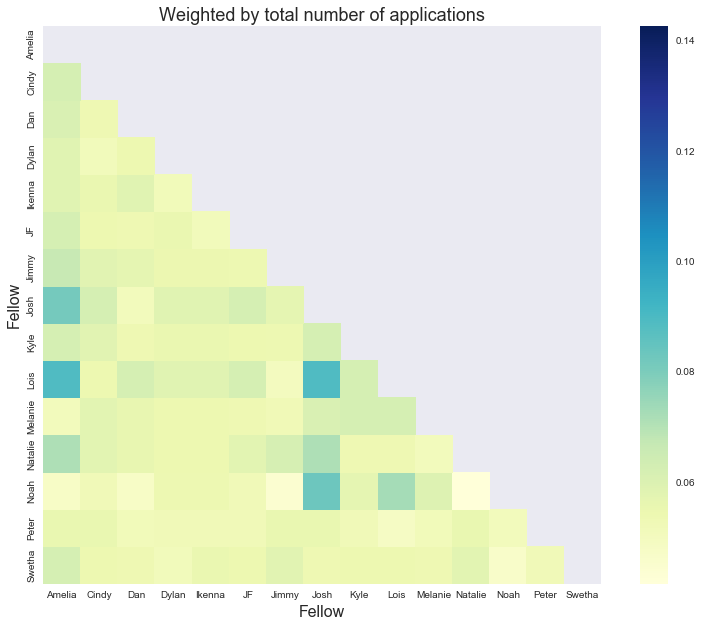

In [82]:
fig,ax = plt.subplots(1,1,figsize=(14,10))
mask = np.zeros_like(coocc)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(coocc,
                mask = mask,
                square=True,
                ax=ax,
                cmap='YlGnBu')
    ax.set_xlabel('Fellow',fontsize=16)
    ax.set_ylabel('Fellow',fontsize=16)
    ax.set_title("Weighted by total number of applications",fontsize=18);